# Ball valve blockage (valve angle vs blockage area)

In [2]:
import math as m
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

In [3]:
def blockage_area(theta, c):
    """
    :param theta: Ball valve closure angle.
    :param c: Radius of ball valve opening when valve is fully open.
    """
    # Ball radius.
    r = c * m.sqrt(2)

    # Parameter a.
    a = c * m.sin(theta) - r * m.sin(theta - m.pi / 4)

    # Solution tolerance.
    tol = 1e-6

    # # Solve for intersection between circle and ellipse, x1.
    # x1 = 0
    # x1_new = -c
    # while abs(x1 - x1_new) > tol:
    #     x1 = x1_new
    #     x1_new = - m.sqrt(r**2 - (c * m.sin(theta) - m.sqrt(a**2 * (1 - x1**2 / c**2)))**2)

    # # x1 = x1_new
    # print(c * m.sin(theta))

    # Solve for intersection between circle and ellipse, x2.
    x2 = 0
    x2_new = c
    while abs(x2 - x2_new) > tol:
        x2 = x2_new
        x2_new = m.sqrt(c**2 - (c * m.sin(theta) - m.sqrt(a**2 * (1 - x2**2 / c**2)))**2)

    # # Define the function whose root we want to find
    # def f(x):
    #     if abs(x) > c:
    #         return np.nan
    #     return np.sqrt(c**2 - x**2) + np.sqrt(a**2 * (1 - x**2 / c**2)) - c * m.sin(theta)

    # # Try solving near x = 0
    # x0 = 0.0
    # sol = fsolve(f, x0)
    # print(sol)

    # Integrate the area between the circle and the ellipse from x1 to x2.
    x = np.linspace(-x2, x2, 1000)
    
    y_circle = np.sqrt(c**2 - x**2)
    y_ellipse = - np.sqrt(a**2 * (1 - x**2 / c**2)) + c * m.sin(theta)

    A_open = np.trapz(y_circle - y_ellipse, x)
    A_block = m.pi * c**2 - A_open

    return A_open, A_block

def blockage_height(theta, c):
    # Ball radius.
    r = c * m.sqrt(2)

    # Parameter a.
    a = c * m.sin(theta) - r * m.sin(theta - m.pi / 4)

    # Height to center of ellipse.
    hc = c * m.sin(theta)

    return c + hc - a

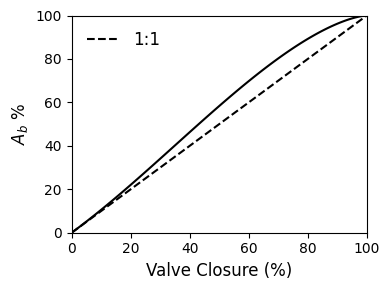

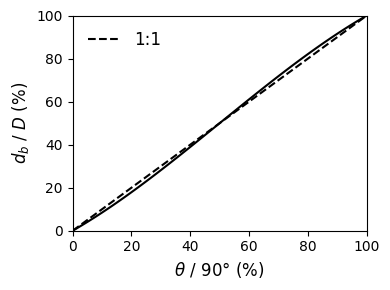

In [8]:
# Blockage area.
thetas = np.linspace(0.0, m.pi / 2, 100)
c = 1.5
A_open = np.zeros_like(thetas)
A_block = np.zeros_like(thetas)
for i, theta in enumerate(thetas):
    A_open[i], A_block[i] = blockage_area(theta, c)

plt.figure(figsize=(4,3))
plt.plot(thetas / (2 * m.pi) * 360 / 90 * 100, A_block / max(A_block) * 100, 'k')
plt.plot([0, 100], [0, 100], 'k--', label='1:1')
plt.legend(fontsize=12, frameon=False)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tick_params(labelsize=10)
plt.xlabel('Valve Closure (%)', fontsize=12)
plt.ylabel('$A_b$ %', fontsize=12)
plt.tight_layout()
plt.savefig(r'C:\Users\ay434\Box\Research\Dissertation\Figures\lab_system\ball_valve_blockage_area.png', dpi=300)
plt.show()

# Blockage height.
h_b = np.zeros_like(thetas)
for i, theta in enumerate(thetas):
    h_b[i] = blockage_height(theta, c)

plt.figure(figsize=(4,3))
plt.plot(thetas / (2 * m.pi) * 360 / 90 * 100, h_b / 3 * 100, 'k')
plt.plot([0, 100], [0, 100], 'k--', label='1:1')
plt.legend(fontsize=12, frameon=False)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tick_params(labelsize=10)
plt.xlabel('$\\theta \ / \ 90 \\degree$ (%)', fontsize=12)
plt.ylabel('$d_b \ / \ D$ (%)', fontsize=12)
plt.tight_layout()
plt.savefig(r'C:\Users\ay434\Box\Research\Dissertation\Figures\lab_system\ball_valve_blockage_height.png', dpi=300)
